# Analyse BlueSeis BSPF Events

## Imports and Paths

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from obspy.clients.fdsn import Client

from functions.request_data import __request_data
from functions.compute_adr_pfo import __compute_adr_pfo
from functions.compute_beamforming_pfo import __compute_beamforming_pfo

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [32]:

path = archive_path+"romy_archive/"
from andbro__read_sds import __read_sds

__read_sds(path, "BW.RLAS..BJZ", config['tbeg'], config['tend'])

0 Trace(s) in Stream:


In [35]:
from obspy import read_inventory

read_inventory(root_path+"Documents/ROMY/stationxml_ringlaser/dataless.seed.BW_RLAS")

Inventory created at 2023-12-04T17:00:47.253469Z
	Created by: ObsPy 1.4.0
		    https://www.obspy.org
	Sending institution: ObsPy's obspy.io.xseed version 1.4.0
	Contains:
		Networks (1):
			BW
		Stations (2):
			BW.RLAS (RingLaser, Bavaria, BW-Net) (2x)
		Channels (5):
			BW.RLAS..BAZ, BW.RLAS..BAN, BW.RLAS..BAE, BW.RLAS..BJZ, 
			BW.RLAS..HJZ

## Configurations

In [28]:
config = {}

## output path for figures
config['path_to_figs'] = data_path+"BSPF/figures/M62_event/"


## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

## Event M62
config['tbeg'] = obs.UTCDateTime("2022-11-22 16:40:15")
config['tend'] = obs.UTCDateTime("2022-11-22 16:42:30")

# config['fmin'] = 1
# config['fmax'] = 5.0

## Load Data

In [4]:
event = Client("USGS").get_events(starttime=config['tbeg']-120, endtime=config['tend'], minmagnitude=4.0)
event = event[0]

## Eventtime
config['eventtime'] = event.origins[0].time

In [5]:
st0 = obs.read("./data/event62_6c.mseed")

submask = "al"

config['fmin'] = 0.1
config['fmax'] = 0.5

# for tr in st0:
#     if "BSPF" in tr.stats.station:
#         tr.data = np.roll(tr.data, 4)

bspf0 = st0.select(station="BSPF").copy()
pfo0 = st0.select(station="PFO*").copy()
adr0 = st0.select(station="RPFO", location=submask[:2]).copy()

 -> sensitivity removed!
 -> response removed!
 -> getting waveforms failed for PY.BPH02..BH* ...
 -> getting waveforms failed for PY.BPH03..BH* ...
 -> continue computing ADR for 3 of 5 stations ...
 -> bandpass: 1.0 - 6.0 Hz
3 Trace(s) in Stream:
II.RPFO.10.BJZ | 2022-11-22T16:40:04.996113Z - 2022-11-22T16:42:39.996113Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJN | 2022-11-22T16:40:04.996113Z - 2022-11-22T16:42:39.996113Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJE | 2022-11-22T16:40:04.996113Z - 2022-11-22T16:42:39.996113Z | 40.0 Hz, 6201 samples


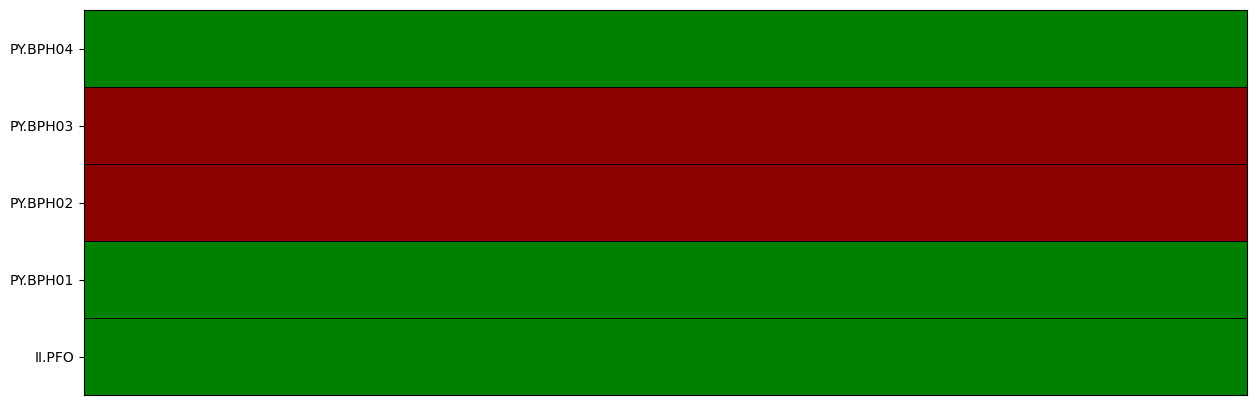


 -> Runtime: 0.24 minutes
 -> getting waveforms failed for PY.BPH02..BH* ...
 -> getting waveforms failed for PY.BPH03..BH* ...
 -> getting waveforms failed for PY.BPH05..BH* ...
 -> continue computing ADR for 6 of 9 stations ...
 -> bandpass: 0.5 - 1.0 Hz
3 Trace(s) in Stream:
II.RPFO.10.BJZ | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJN | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJE | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples


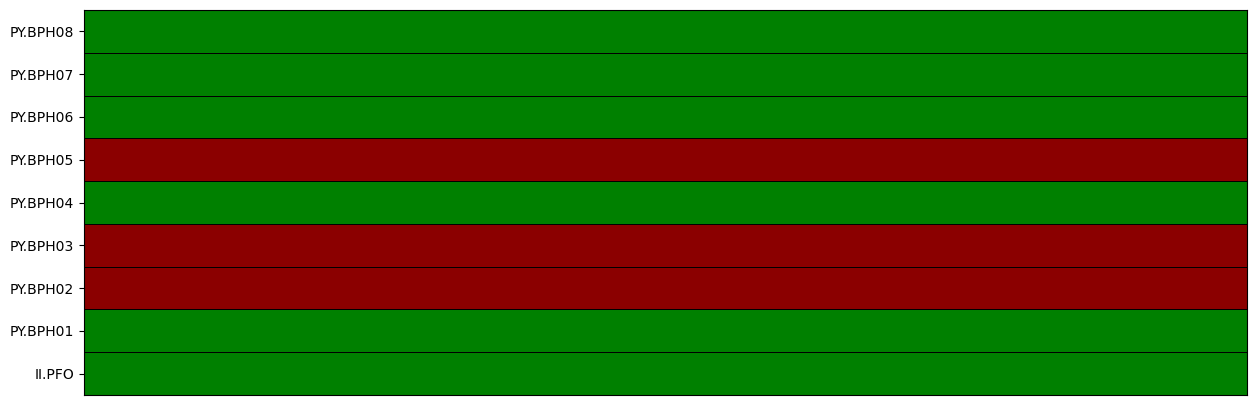


 -> Runtime: 0.43 minutes
 -> getting waveforms failed for PY.BPH02..BH* ...
 -> getting waveforms failed for PY.BPH03..BH* ...
 -> getting waveforms failed for PY.BPH05..BH* ...
 -> continue computing ADR for 6 of 9 stations ...
 -> bandpass: 0.5 - 1.0 Hz
3 Trace(s) in Stream:
II.RPFO.10.BJZ | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJN | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples
II.RPFO.10.BJE | 2022-11-22T16:40:04.996506Z - 2022-11-22T16:42:39.996506Z | 40.0 Hz, 6201 samples


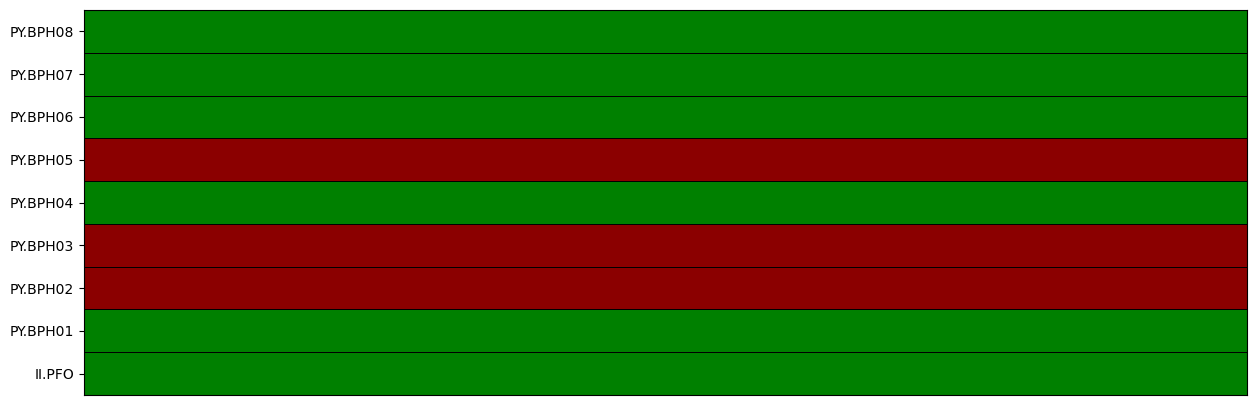


 -> Runtime: 0.42 minutes


In [6]:
# ##load rotation
# bspf0, bspf_inv = __request_data("PY.BSPF..HJ*", config['tbeg']-10, config['tend']+10)
# bspf0 = bspf0.resample(40, no_filter=False);

# # bspf0 = bspf0.detrend("linear").taper(0.01).filter("lowpass", freq=18.0, corners=4, zerophase=True)
# # bspf0 = bspf0.decimate(5, no_filter=True) ## 200 -> 40 Hz
# # bspf0 = bspf0.trim(config['tbeg'], config['tend'])

# ## load translation
# pfo0, pfo_inv = __request_data("II.PFO.10.BH*", config['tbeg']-10, config['tend']+10, translation_type="ACC")
# pfo0 = pfo0.resample(40, no_filter=False);

# # pfo0 = pfo0.detrend("linear").taper(0.01).filter("lowpass", freq=18.0, corners=4, zerophase=True)
# # pfo0 = pfo0.decimate(5, no_filter=True) ## 200 -> 40 Hz
# # pfo0 = pfo0.trim(config['tbeg'], config['tend'])

# # merge to one stream
# st0 = bspf0.copy();
# st0 += pfo0.copy();

# ## ADR
# submask = "inner"
# adr0, status = __compute_adr_pfo(config['tbeg']-10, config['tend']+10, submask=submask, status=True)
# for tr in adr0:
#     tr.stats.location = "in"
# st0 += adr0.copy();

# submask = "mid"
# adr0, status = __compute_adr_pfo(config['tbeg']-10, config['tend']+10, submask=submask, status=True)
# for tr in adr0:
#     tr.stats.location = "mi"
# st0 += adr0.copy();

# # submask = "all"
# adr0, status = __compute_adr_pfo(config['tbeg']-10, config['tend']+10, submask=submask, status=True)
# for tr in adr0:
#     tr.stats.location = "al"
# st0 += adr0.copy();


# st0.trim(config['tbeg'], config['tend'])

# st0.write("./data/event62_6c.mseed", format="MSEED")

# # st0.plot(equal_scale=False);

## Create stream for all data

In [7]:
def __makeplot_waveform_comparison_all(st_in):

    from obspy.signal.cross_correlation import correlate

    st = st_in.copy()

    # st = st.trim(st[0].stats.starttime+5, st[0].stats.endtime-15).copy()

    fig, ax = plt.subplots(9, 1, figsize=(15, 15), sharex=True)

    lw = 1.2

    font = 12

    fband = [(1.0, 6.0), (0.5, 1.0), (0.1, 0.5)]

    offset = [0, 0, 0]

    plt.subplots_adjust(hspace=0.05)

    scaling = 1e6

    idx = 0
    for _m, array in enumerate(["in", "mi", "al"]):

        _adr = st.select(location=array).copy()
        _bspf = st.select(station="BSPF").copy()

        _bspf = _bspf.detrend("simple").taper(0.1).filter("bandpass", freqmin=fband[_m][0], freqmax=fband[_m][1], corners=4, zerophase=True)
        _adr = _adr.detrend("simple").taper(0.1).filter("bandpass", freqmin=fband[_m][0], freqmax=fband[_m][1], corners=4, zerophase=True)

        for _k, comp in enumerate(["Z", "N", "E"]):

            ax[idx].plot(_bspf.select(channel=f"*{comp}")[0].times(), _bspf.select(channel=f"*{comp}")[0].data*scaling, label=f"BSPF-{comp}", color="k", lw=lw)
            ax[idx].plot(_adr.select(channel=f"*{comp}")[0].times(), _adr.select(channel=f"*{comp}")[0].data*scaling, label=f"{array[0]}ADR-{comp}", color="r", lw=lw)

            cc = round(correlate(_bspf.select(channel=f"*{comp}")[0].data, _adr.select(channel=f"*{comp}")[0].data, 0, demean=True, normalize='naive', method='auto')[0], 2)

            ax[idx].text(0.01, 0.9, f"{fband[_m][0]}-{fband[_m][1]} Hz", ha='left', va='top', transform=ax[idx].transAxes, fontsize=font-2)
            ax[idx].text(0.08, 0.9, f"CC={cc}", ha='left', va='top', transform=ax[idx].transAxes, fontsize=font-2)

            ax[idx].legend(loc=1, ncols=4, fontsize=font-2)

            # ax[idx].grid(which="both", alpha=0.5)

            ax[idx].set_ylabel("$\Omega$ ($\mu$rad/s)")
            if idx < 8:
                ax[idx].tick_params(axis='x', bottom=False)

            for pos in ["right", "top", "bottom"]:
                ax[idx].spines[pos].set_visible(False)

            idx+=1

    ax[idx-1].spines["bottom"].set_visible(True)

    ax[idx-1].set_xlabel("Time (s)")

    # ax[0].set_title(f"{config['tbeg'].date} | {config['fmin']}-{config['fmax']} Hz | ADR {submask} | CC$_Z$ = {cc_Z} | CC$_N$ = {cc_N} | CC$_E$ = {cc_E}")

    plt.show();
    return fig

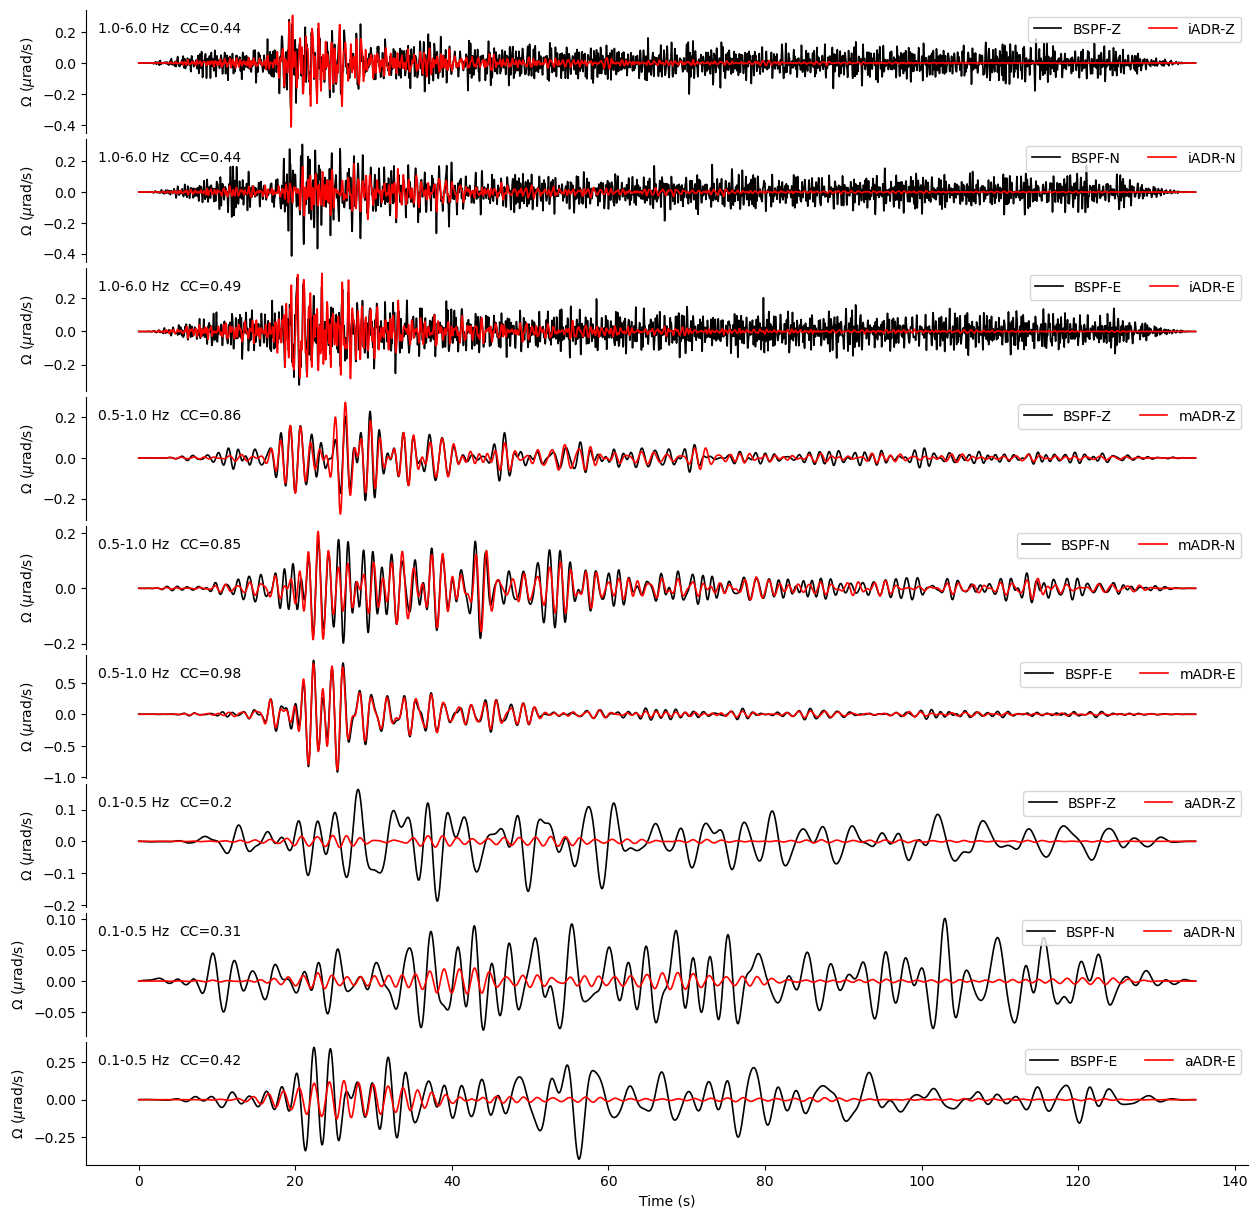

In [8]:
fig = __makeplot_waveform_comparison_all(st0);

fig.savefig(config['path_to_figs']+f"BSPF_M62_waveforms_all.png", format="png", dpi=200, bbox_inches='tight');


In [9]:
def __makeplot_waveform_comparison(bspf, adr, submask):

    from obspy.signal.cross_correlation import correlate

    fig, ax = plt.subplots(3, 1, figsize=(15, 5), sharex=True)

    lw = 1.2
    font = 14

    ax[0].plot(bspf.select(channel="*Z")[0].times(), bspf.select(channel="*Z")[0].data, label="BSPF Z", color="k", lw=lw)
    ax[0].plot(adr.select(channel="*Z")[0].times(), adr.select(channel="*Z")[0].data, label="ADR Z", color="r", lw=lw)

    ax[1].plot(bspf.select(channel="*N")[0].times(), bspf.select(channel="*N")[0].data, label="BSPF N", color="k", lw=lw)
    ax[1].plot(adr.select(channel="*N")[0].times(), adr.select(channel="*N")[0].data, label="ADR N", color="r", lw=lw)

    ax[2].plot(bspf.select(channel="*E")[0].times(), bspf.select(channel="*E")[0].data, label="BSPF E", color="k", lw=lw)
    ax[2].plot(adr.select(channel="*E")[0].times(), adr.select(channel="*E")[0].data, label="ADR E", color="r", lw=lw)

    cc_Z = round(correlate(bspf.select(channel="*Z")[0].data, adr.select(channel="*Z")[0].data, 0, demean=True, normalize='naive', method='auto')[0], 1)
    cc_N = round(correlate(bspf.select(channel="*N")[0].data, adr.select(channel="*N")[0].data, 0, demean=True, normalize='naive', method='auto')[0], 1)
    cc_E = round(correlate(bspf.select(channel="*E")[0].data, adr.select(channel="*E")[0].data, 0, demean=True, normalize='naive', method='auto')[0], 1)

    for i in range(3):
        ax[i].legend(loc=1, ncols=4)
        ax[i].grid(which="both", alpha=0.5)
        # ax[i].set_xscale("log")
        ax[i].set_ylabel("$\Omega$ (rad/s)")

    ax[2].set_xlabel("Time (s)")
    ax[0].set_title(f"{config['tbeg'].date} | {config['fmin']}-{config['fmax']} Hz | ADR {submask} | CC$_Z$ = {cc_Z} | CC$_N$ = {cc_N} | CC$_E$ = {cc_E}")

    plt.show();
    return fig

In [10]:
# config['fmin'] = 0.1
# config['fmax'] = 0.5

# # config['fmin'] = 1.0
# # config['fmax'] = 6.0

# # config['fmin'] = 0.5
# # config['fmax'] = 1.0

# bspf = bspf0.copy()
# bspf = bspf.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'])

# adr = adr0.copy()
# adr = adr.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax']);

# pfo = pfo0.copy()
# pfo = pfo.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'])

# for tr in bspf:
#     print(tr.stats.channel, max(tr.data))


# fig = __makeplot_waveform_comparison(bspf, adr, submask)

# fig.savefig(config['path_to_figs']+f"BSPF_M62_waveforms_{submask}.png", format="png", dpi=200, bbox_inches='tight');

## Spectra Comparison

In [19]:
def __makeplot_spectra_comparison(st_rot, st_acc, fmin=None, fmax=None):

    def __multitaper_psd(arr, dt, n_win=5, time_bandwidth=4.0):

        import multitaper as mt

        out_psd = mt.MTSpec(arr, nw=time_bandwidth, kspec=n_win, dt=dt, iadapt=0)

        _f, _psd = out_psd.rspec()

        f = _f.reshape(_f.size)
        psd = _psd.reshape(_psd.size)

        ## 95% confidence interval
        # _psd95 = out_psd.jackspec()
        # psd95_lower, psd95_upper = psd95[::2, 0], psd95[::2, 1]

        return f, psd

    Tsec = 5
    f1_Z, psd1_Z = __multitaper_psd(st_rot.select(channel="*Z")[0].data, st_rot[0].stats.delta ,n_win=Tsec)
    f2_Z, psd2_Z = __multitaper_psd(st_acc.select(channel="*Z")[0].data, st_acc[0].stats.delta ,n_win=Tsec)

    f1_U, psd1_U = __multitaper_psd(st_rot.select(channel="*N")[0].data, st_rot[0].stats.delta ,n_win=Tsec)
    f2_N, psd2_N = __multitaper_psd(st_acc.select(channel="*N")[0].data, st_acc[0].stats.delta ,n_win=Tsec)

    f1_V, psd1_V = __multitaper_psd(st_rot.select(channel="*E")[0].data, st_rot[0].stats.delta ,n_win=Tsec)
    f2_E, psd2_E = __multitaper_psd(st_acc.select(channel="*E")[0].data, st_acc[0].stats.delta ,n_win=Tsec)


    fig, ax = plt.subplots(3, 1, figsize=(15, 5), sharex=True)

    font = 14

    rot_scaling = 1e9

    lw = 1

    ax[0].plot(f1_Z, psd1_Z, lw=lw, label=f"{st_rot[0].stats.station}.{st_rot[0].stats.channel}", color="darkred", ls="-", zorder=3)

    ax00 = ax[0].twinx()
    ax00.plot(f2_Z, psd2_Z, lw=lw, label=f"{st_acc[0].stats.station}.{st_acc[0].stats.channel}", color="black", zorder=2)

    ax[1].plot(f1_U, psd1_U, lw=lw, label=f"{st_rot[1].stats.station}.{st_rot[1].stats.channel}", color="darkred", ls="-", zorder=3)
    ax11 = ax[1].twinx()
    ax11.plot(f2_N, psd2_N, lw=lw, label=f"{st_acc[1].stats.station}.{st_acc[1].stats.channel}", color="black", zorder=2)

    ax[2].plot(f1_V, psd1_V, lw=lw, label=f"{st_rot[2].stats.station}.{st_rot[2].stats.channel}", color="darkred", ls="-", zorder=3)
    ax22 = ax[2].twinx()
    ax22.plot(f2_E, psd2_E, lw=lw, label=f"{st_acc[2].stats.station}.{st_acc[2].stats.channel}", color="black", zorder=2)


    for i in range(3):
        ax[i].legend(loc=1, ncols=4)
        # ax[i].set_xscale("log")
        # ax[i].set_yscale("log")
        ax[i].grid(which="both", alpha=0.5)
        ax[i].set_ylabel(r"PSD (rad$^2$/s$^2$/Hz)", color="darkred")
        ax[i].tick_params(axis='y', colors='darkred')

        if fmin:
            ax[i].set_xlim(left=fmin)
        if fmax:
            ax[i].set_xlim(right=fmax)
        else:
            ax[i].set_xlim(right=st_rot[0].stats.sampling_rate*0.5)

    for _ax in [ax00, ax11, ax22]:
        _ax.set_xlim(2e-2, 2e1)
        _ax.set_ylabel(r"PSD (m$^2$/s$^4$/Hz)")
        _ax.legend(loc=4)

        if fmin:
            _ax.set_xlim(left=fmin)
        if fmax:
            _ax.set_xlim(right=fmax)
        else:
            _ax.set_xlim(right=st_rot[0].stats.sampling_rate*0.5)

    ax[2].set_xlabel("Frequency (Hz)")
    # ax[0].set_title(f"{config['tbeg'].date} {str(config['tbeg'].time).split('.')[0]} UTC | {config['fmin']}-{config['fmax']} Hz ")

    plt.show();
    return fig

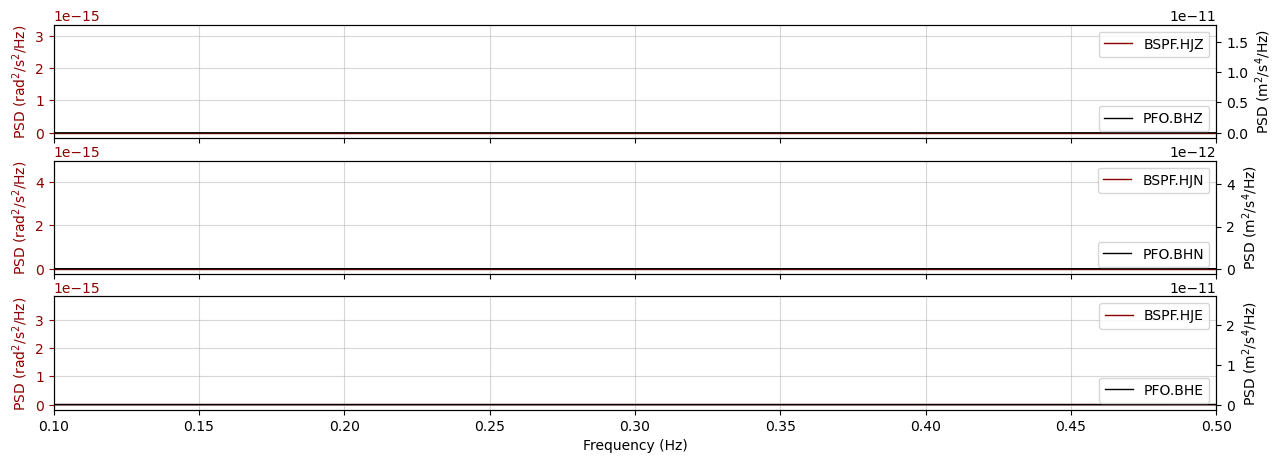

In [24]:
fmin, fmax = 0.1, 0.5

bspf = st0.select(station="BSPF").copy()

bspf = bspf.detrend("linear")
bspf = bspf.taper(0.01)
bspf = bspf.filter("bandpass", freqmin=1, freqmax=5.0, corners=4, zerophase=True)

# bspf.plot();


acc = st0.select(station="PFO*").copy()

acc = acc.detrend("linear")
acc = acc.taper(0.01)
acc = acc.filter("bandpass", freqmin=1, freqmax=5.0, corners=4, zerophase=True)

# acc.plot();

fig = __makeplot_spectra_comparison(bspf, acc, fmin=fmin, fmax=fmax)

### Wavelet Comparison

In [12]:
from functions.compute_cross_wavelet_transform import __compute_cross_wavelet_transform

In [13]:
acc = st0.select(station="PFO*").copy().detrend("demean")
rot = st0.select(station="BSPF").copy().detrend("demean")
adr = st0.select(station="RPFO").copy().detrend("demean")

rot.detrend("demean").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'])
adr.detrend("demean").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'])


comp = "Z"

out = __compute_cross_wavelet_transform(
                                    rot[0].times(),
                                    rot.select(channel=f"*{comp}")[0].data,
                                    adr.select(channel=f"*{comp}")[0].data,
                                    rot[0].stats.delta,
                                    xwt_threshold=0.,
                                    fmax_limit=config['fmax'],
                                    normalize=True,
                                    plot=True,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_xwt_{comp}_{submask}.png", format="png", dpi=200, bbox_inches='tight');

Warning: Cannot place an upperbound on the unbiased AR(1). Series is too short or trend is to large.

## Backazimuth

In [14]:
from functions.compute_backazimuth import __compute_backazimuth

In [15]:
acc = st0.select(station="PFO*").copy()
rot = st0.select(station="BSPF").copy()

fmin, fmax = config['fmin'], config['fmax']

rot.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax)
acc.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax)


# acc.select(channel="*Z")[0].data *= -1
# rot.select(channel="*Z")[0].data *= -1
# rot.select(channel="*E")[0].data *= -1
# rot.select(channel="*N")[0].data *= -1

3 Trace(s) in Stream:
PY.BSPF..HJZ | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples
PY.BSPF..HJN | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples
PY.BSPF..HJE | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples

3 Trace(s) in Stream:
II.PFO.10.BHZ | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples
II.PFO.10.BHN | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples
II.PFO.10.BHE | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples

In [16]:
config['station_longitude'] = config['BSPF_lon']
config['station_latitude']  = config['BSPF_lat']

## specify window length for baz estimation in seconds
config['win_length_sec'] = 1/fmin

## define an overlap for the windows in percent (50 -> 50%)
config['overlap'] = 50

## specify steps for degrees of baz
config['step'] = 1

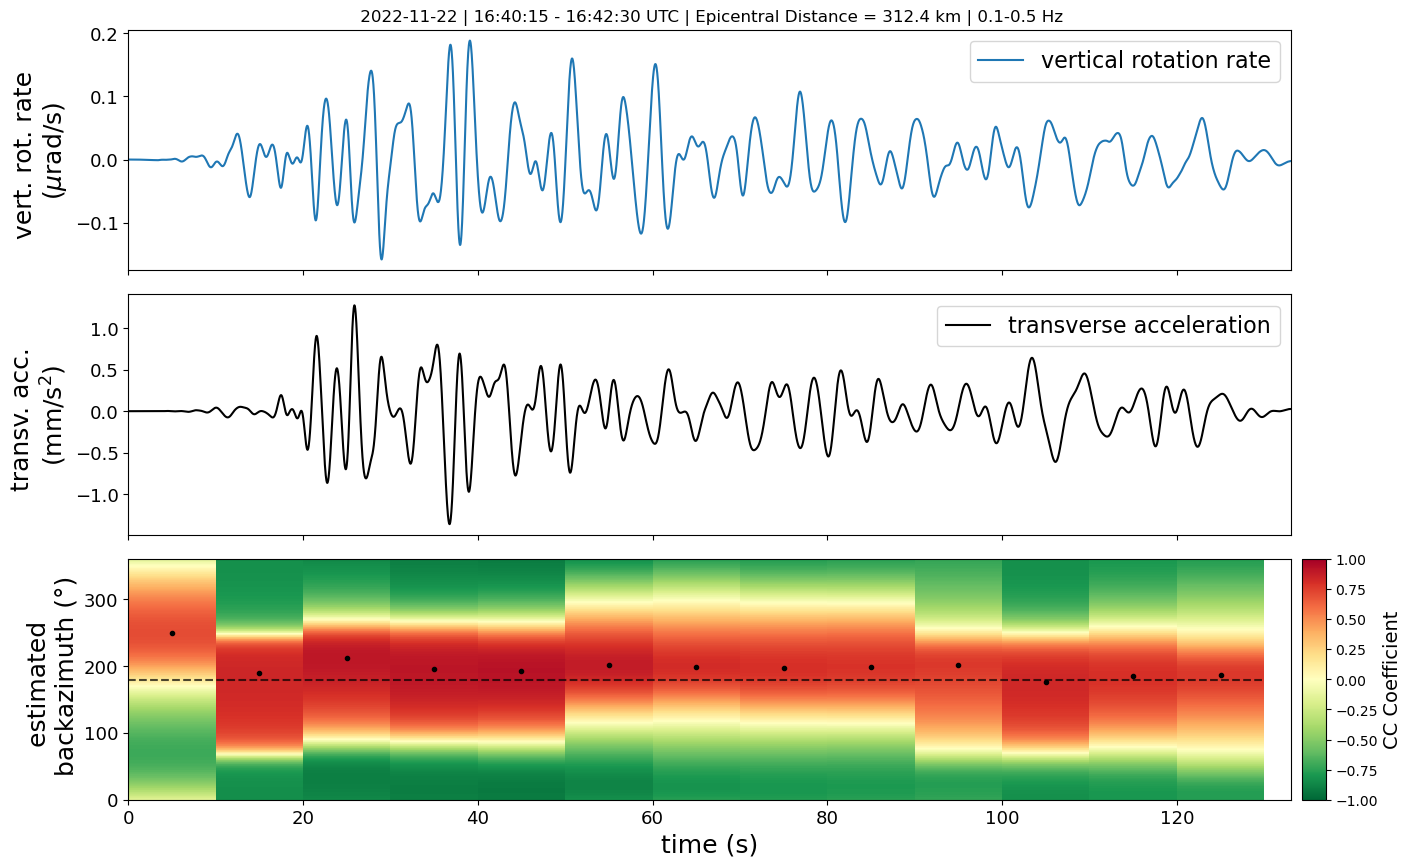

In [17]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='love',
                            event=event,
                            plot=True,
                            flim=(fmin, fmax),
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_baz_love_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


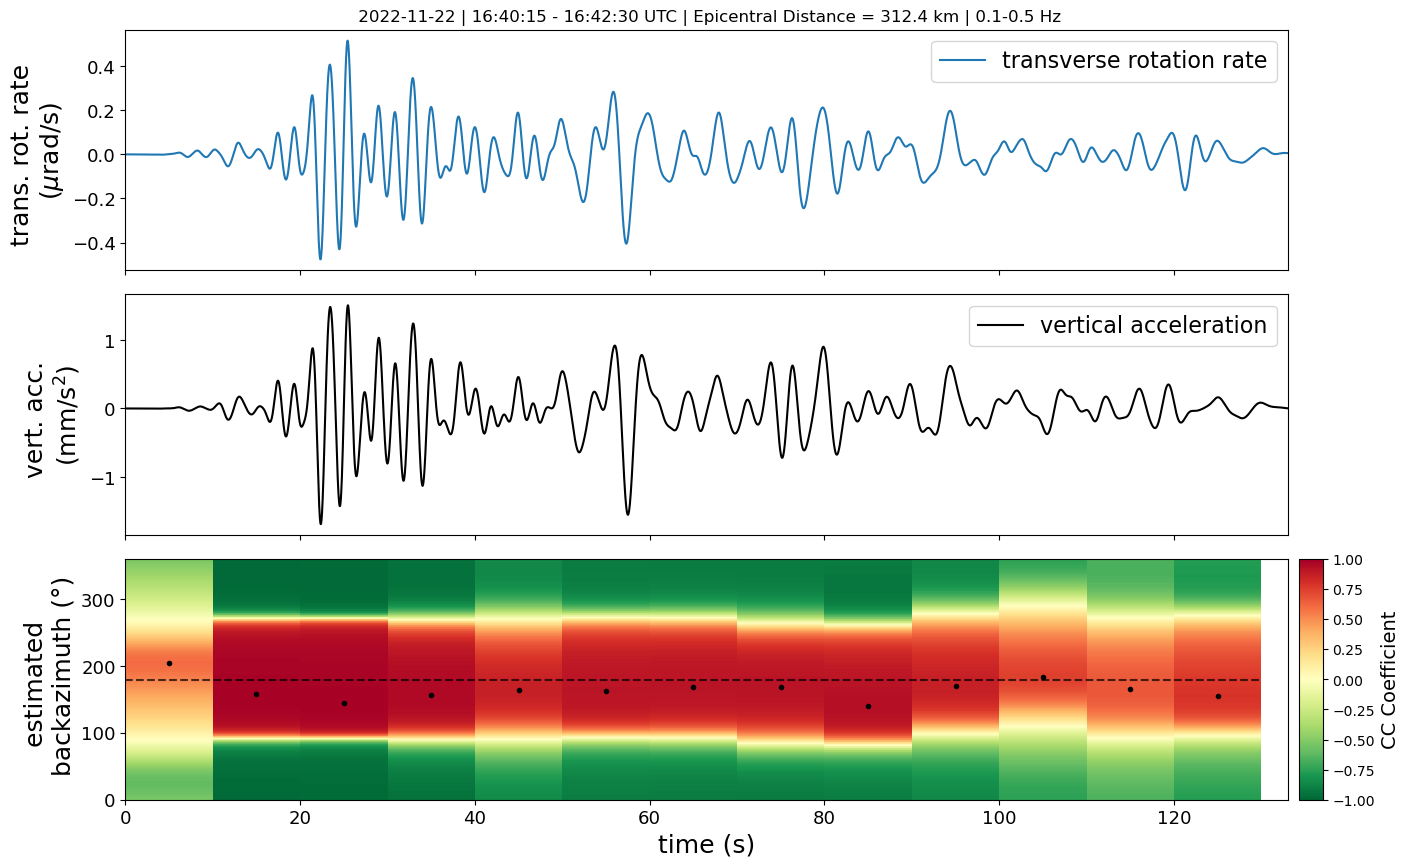

In [18]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='rayleigh',
                            event=event,
                            plot=True,
                            flim=(fmin, fmax),
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_baz_rayleigh_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


In [19]:
from functions.get_theoretical_backazimuth import __get_theoretical_backazimuth

In [20]:
config['event'] = event

baz, az, dist = __get_theoretical_backazimuth(config['BSPF_lat'], config['BSPF_lon'], event_obj=event, fdsn_client='USGS')

In [21]:
from functions.compute_backazimuth_tangent import __compute_backazimuth_tangent

In [22]:
acc = st0.select(station="PFO*").copy()
rot = st0.select(station="BSPF").copy()

fmin, fmax = 0.5, 2.0
# fmin, fmax = config['fmin'], config['fmax']


rot.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax)
acc.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax)

# for tr in rot:
#     tr.data = np.roll(tr.data, -10)

# for tr in acc:
#     if "*Z" in tr.stats.channel:
#         tr.data *= -1

# rot.select(channel="*Z")[0].data *= -1
# rot.select(channel="*E")[0].data *= -1
# rot.select(channel="*N")[0].data *= -1

3 Trace(s) in Stream:
PY.BSPF..HJZ | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples
PY.BSPF..HJN | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples
PY.BSPF..HJE | 2022-11-22T16:40:16.001000Z - 2022-11-22T16:42:29.001000Z | 40.0 Hz, 5321 samples

3 Trace(s) in Stream:
II.PFO.10.BHZ | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples
II.PFO.10.BHN | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples
II.PFO.10.BHE | 2022-11-22T16:40:15.994538Z - 2022-11-22T16:42:28.994538Z | 40.0 Hz, 5321 samples

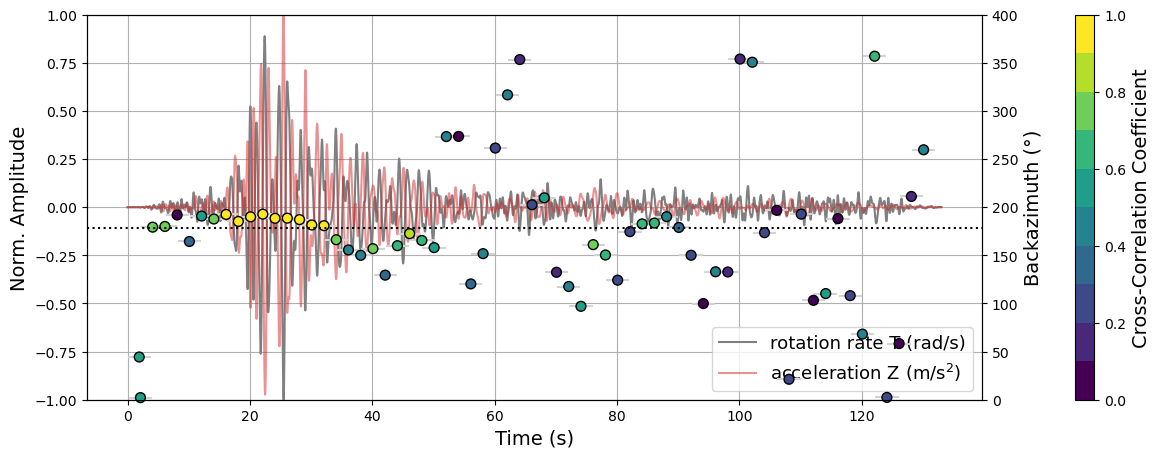

In [23]:
out = __compute_backazimuth_tangent(
                                    rot,
                                    acc,
                                    win_time_s=1/fmin,
                                    overlap=0.9,
                                    baz_theo=baz,
                                    cc_thres=0,
                                    plot=True,
                                    )

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_baz_tangent_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Compare Backazimuth Codes

In [24]:
from functions.compare_backazimuth_codes import __compare_backazimuth_codes

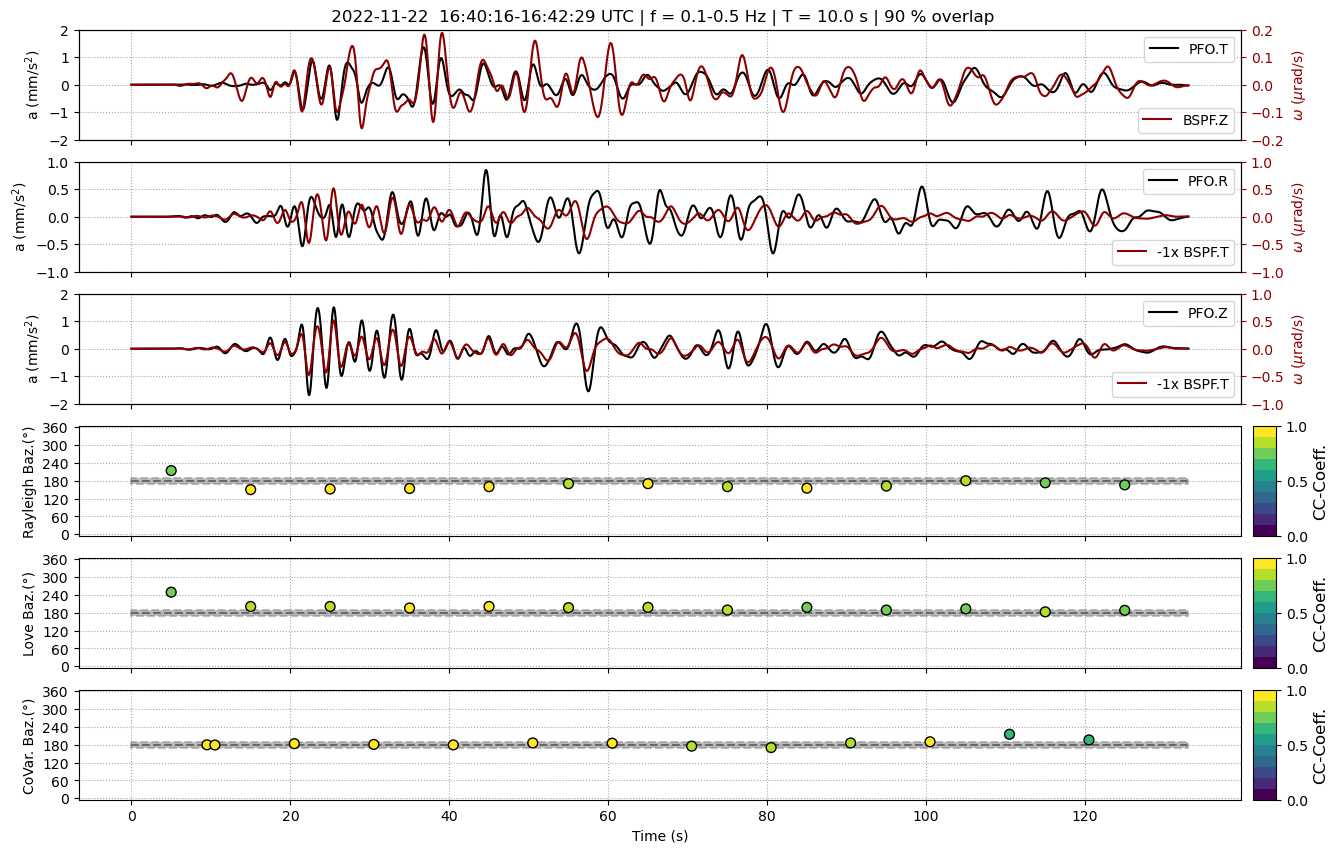

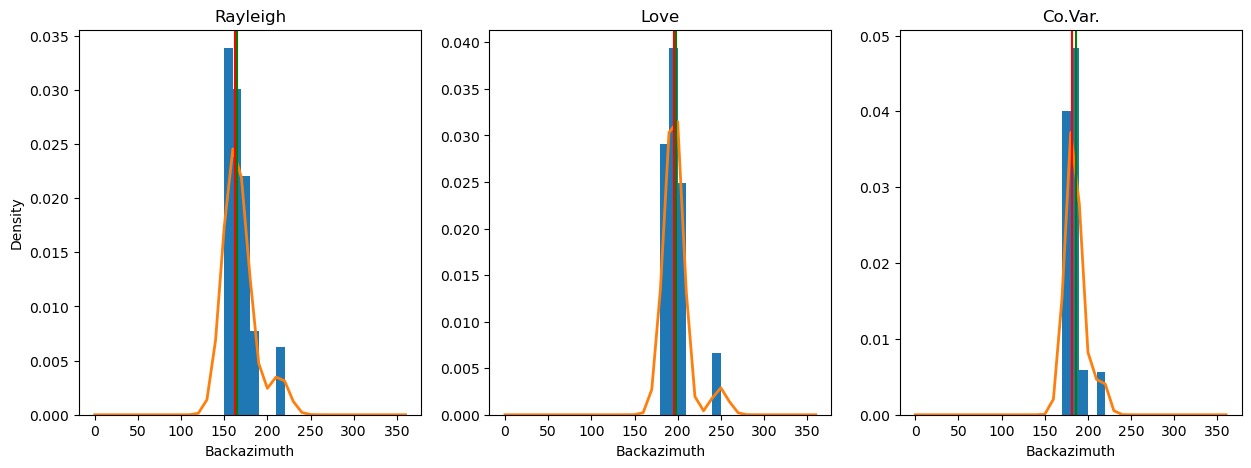

In [25]:
st = st0.copy();

acc = st.select(station="PFO*");
rot = st.select(station="BSPF");
# rot = st.select(station="RPFO", location="in");
# rot = st.select(station="RPFO", location="mi");
# rot = st.select(station="RPFO", location="al");

# for tr in rot:
#     tr.data = np.roll(tr.data, -10)


fmin, fmax = config['fmin'], config['fmax']
# fmin, fmax = 0.2, 2.0

out = __compare_backazimuth_codes(rot, acc, event, fmin, fmax, plot=True);

out['fig1'].savefig(config['path_to_figs']+f"BSPF_M62_baz_comparison_{rot[0].stats.location}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05);
out['fig2'].savefig(config['path_to_figs']+f"BSPF_M62_baz_comparison_{rot[0].stats.location}_{fmin}_{fmax}_hist.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

## Compare backazimuth estimate for ADR, BSPF and Beamforming

In [26]:
from functions.compute_beamforming_pfo import __compute_beamforming_pfo

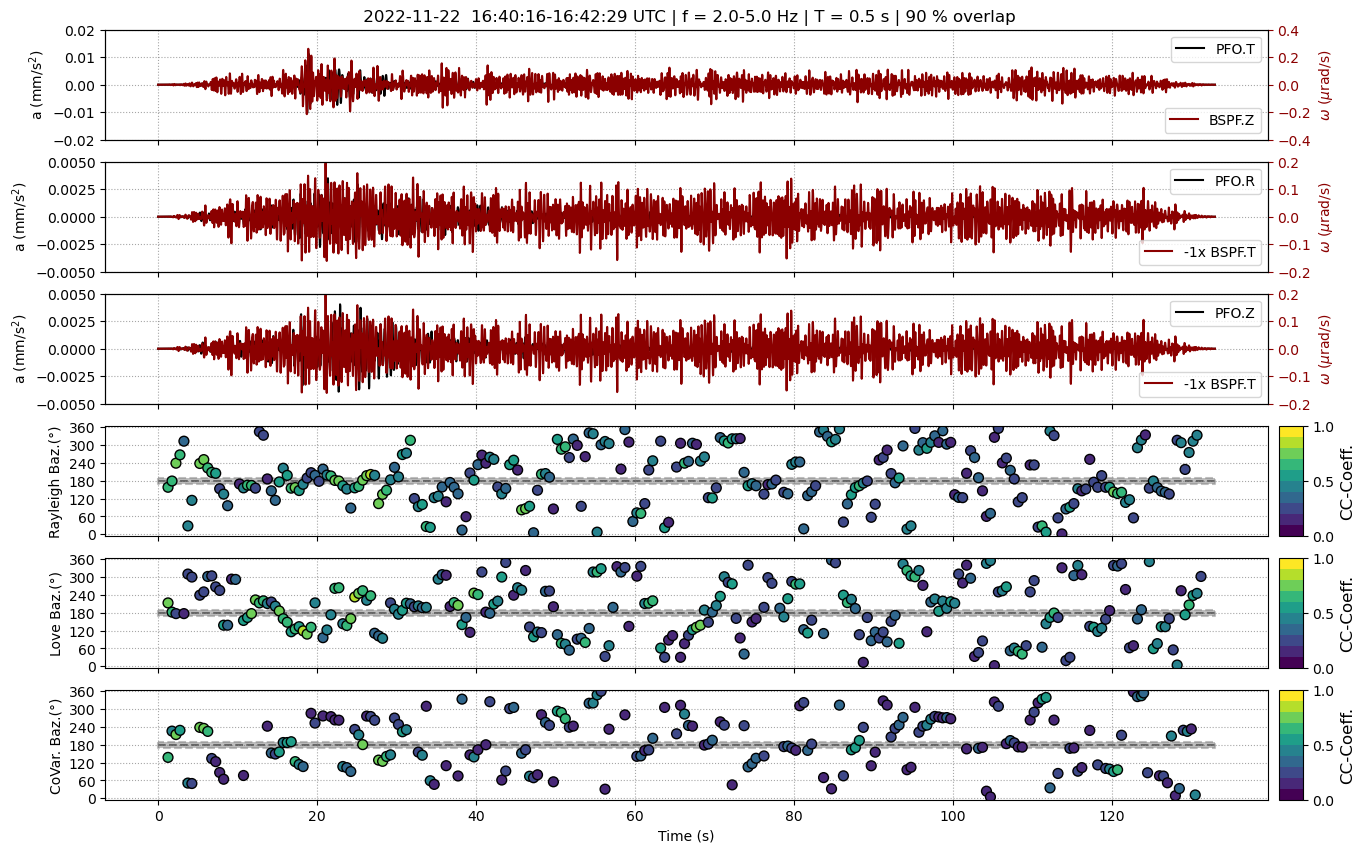

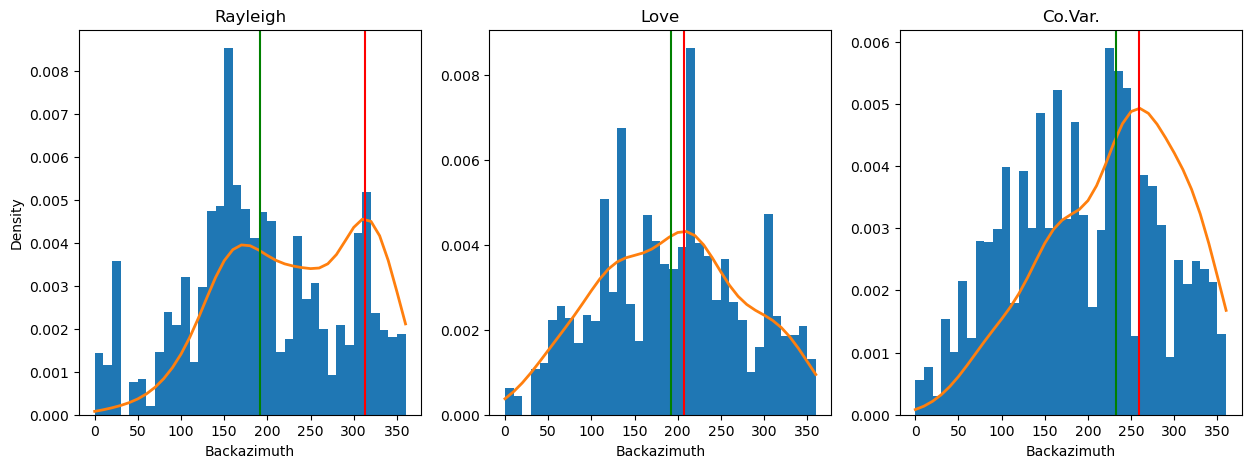

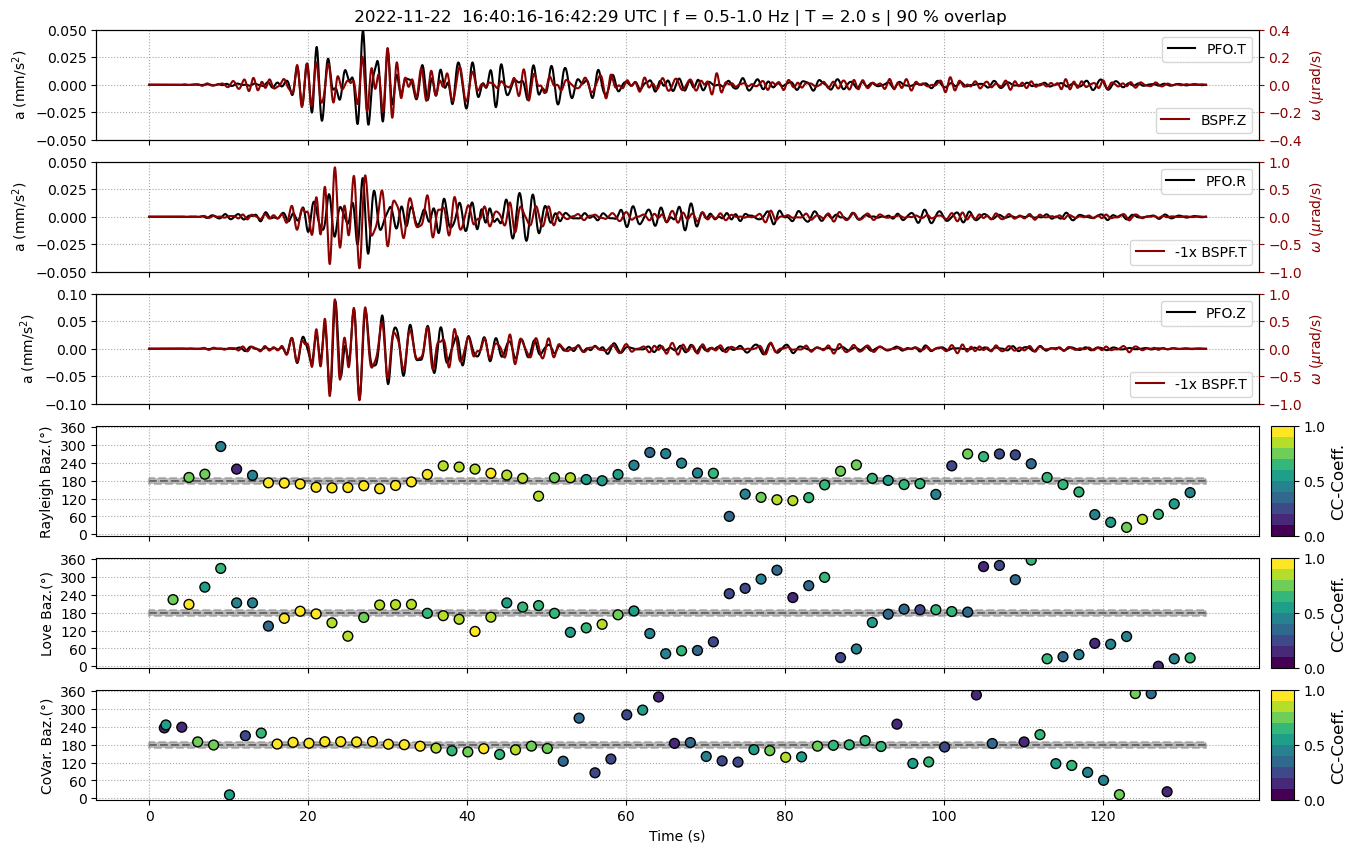

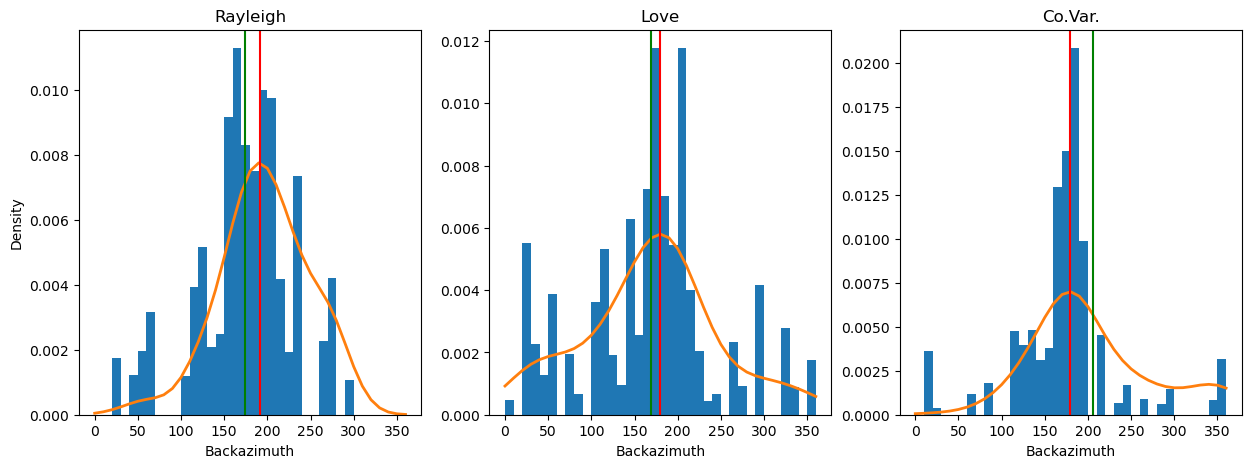

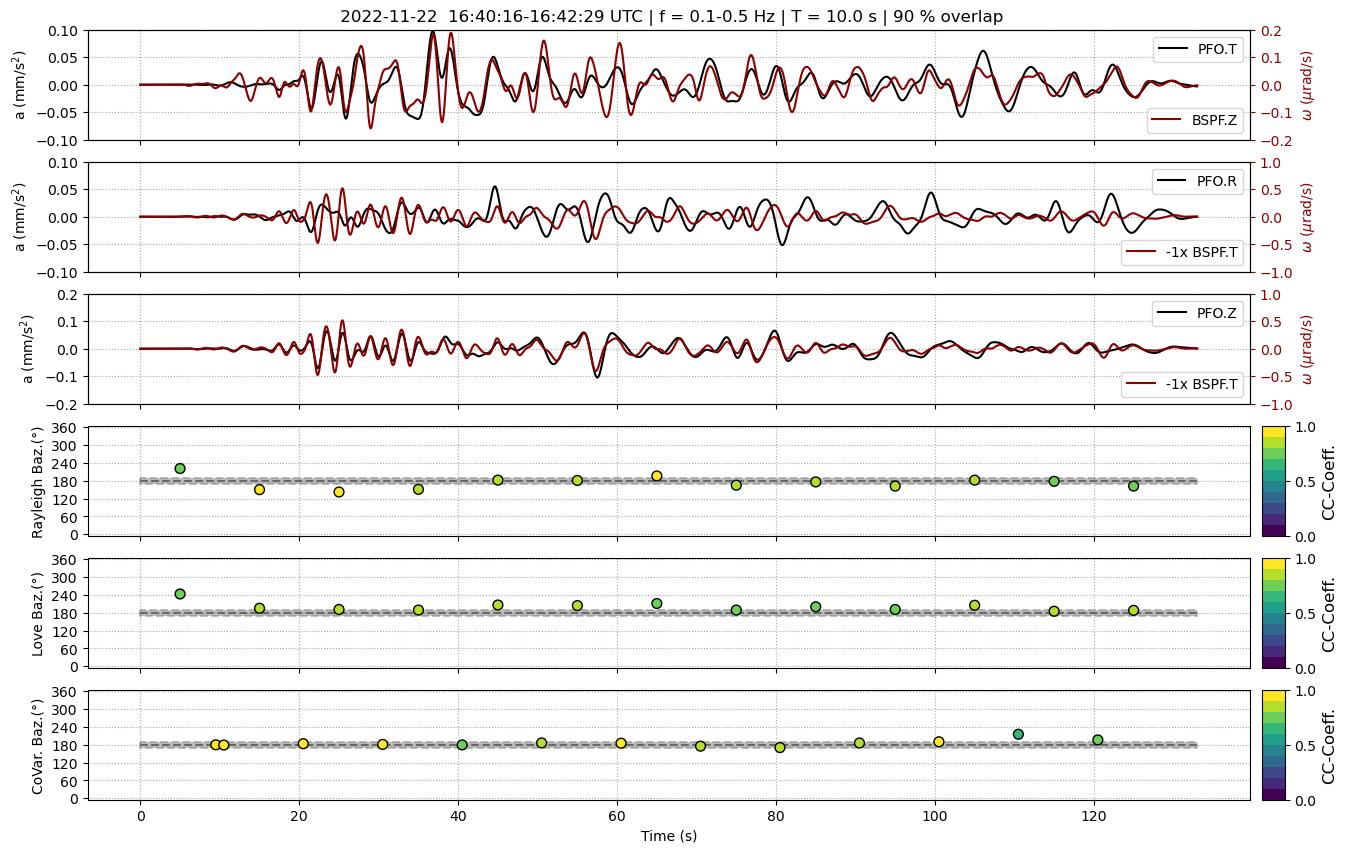

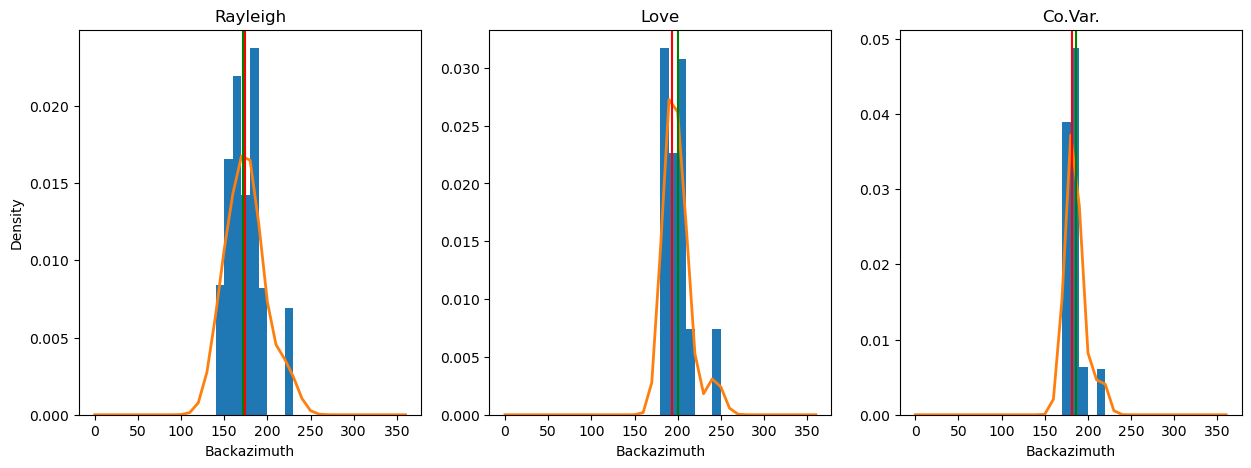

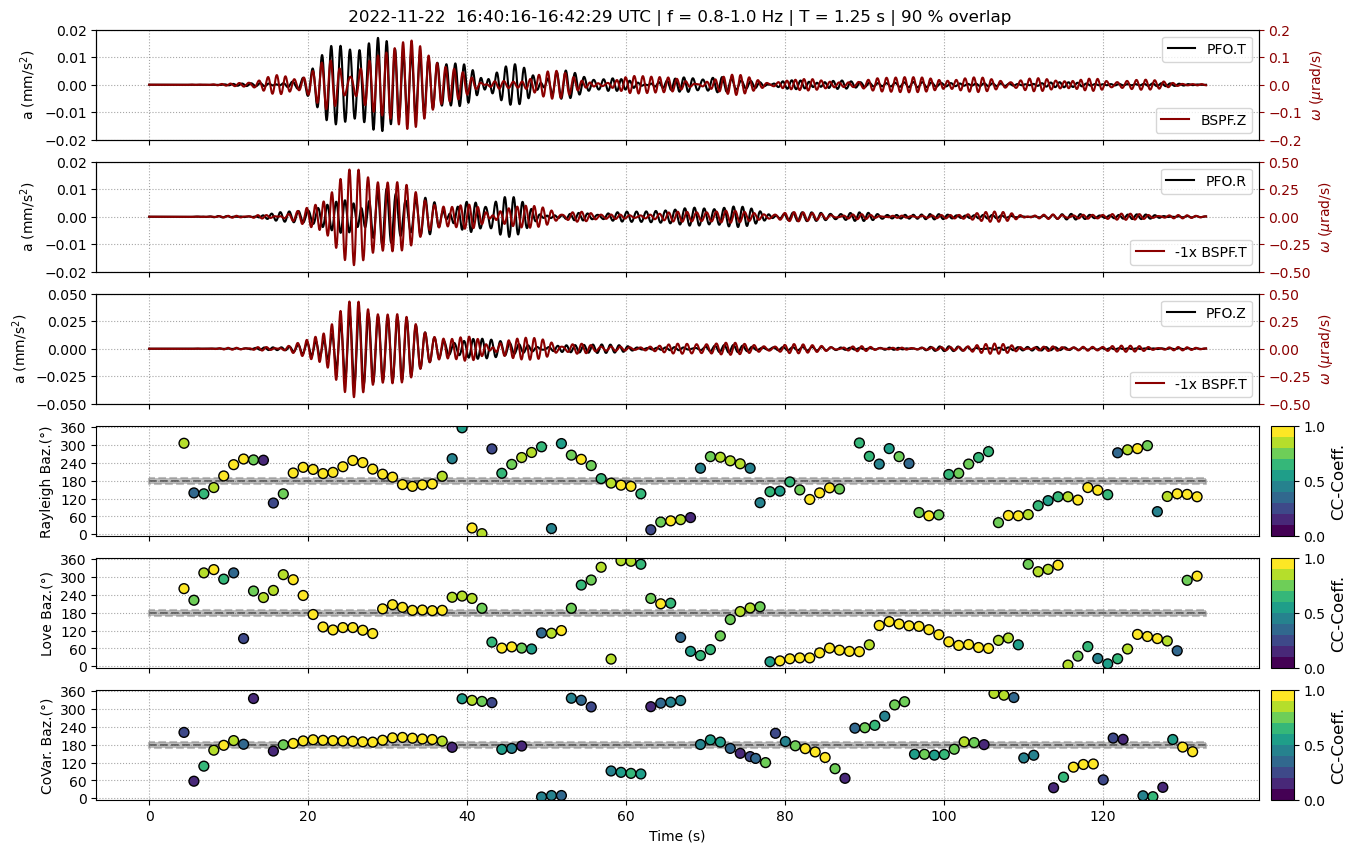

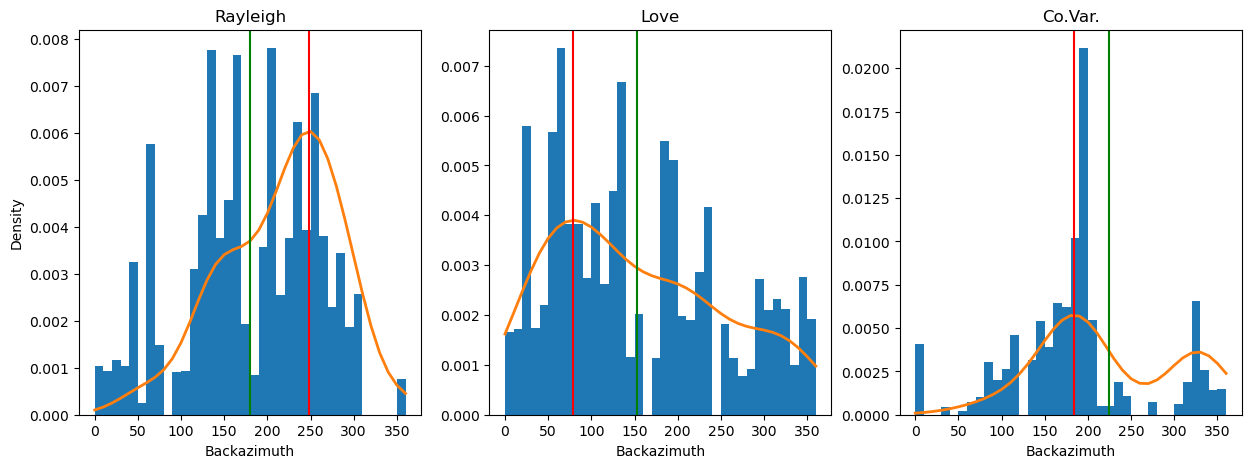

 -> obtained: 3 of 3 stations!

 -> Runtime: 0.26 minutes
 -> obtained: 6 of 6 stations!

 -> Runtime: 0.48 minutes
 -> obtained: 11 of 11 stations!

 -> Runtime: 0.77 minutes
 -> obtained: 6 of 6 stations!

 -> Runtime: 0.44 minutes


In [33]:
stt = st0.copy();

acc = stt.copy().select(station="PFO*");


cc_thres = 0.1

## ____________________
## direct rotation
rot = stt.copy().select(station="BSPF");
out_bspf_i = __compare_backazimuth_codes(rot, acc, event, 2.0, 5.0, cc_thres=cc_thres, plot=True);

rot = stt.copy().select(station="BSPF");
out_bspf_m = __compare_backazimuth_codes(rot, acc, event, 0.5, 1.0, cc_thres=cc_thres, plot=True);

rot = stt.copy().select(station="BSPF");
out_bspf_a = __compare_backazimuth_codes(rot, acc, event, 0.1, 0.5, cc_thres=cc_thres, plot=True);

rot = stt.copy().select(station="BSPF");
out_bspf_o = __compare_backazimuth_codes(rot, acc, event, 0.8, 1.0, cc_thres=cc_thres, plot=True);

# out = __compare_backazimuth_codes(rot, acc, event, fmin, fmax, cc_thres=0.2, plot=True);


## ____________________
## adr rotation
rot = stt.copy().select(station="RPFO", location="in");
out_adr_i = __compare_backazimuth_codes(rot, acc, event, 2.0, 5.0, cc_thres=cc_thres, plot=False);

rot = stt.copy().select(station="RPFO", location="mi");
out_adr_m = __compare_backazimuth_codes(rot, acc, event, 0.5, 1.0, cc_thres=cc_thres, plot=False);

rot = stt.copy().select(station="RPFO", location="al");
out_adr_a = __compare_backazimuth_codes(rot, acc, event, 0.1, 0.5, cc_thres=cc_thres, plot=False);

rot = stt.copy().select(station="RPFO", location="mi");
out_adr_o = __compare_backazimuth_codes(rot, acc, event, 0.8, 1.0, cc_thres=cc_thres, plot=False);

## ____________________
## array beamforming
out_bf_i = __compute_beamforming_pfo(config['tbeg'], config['tend'], fmin=2.0, fmax=5.0, component="Z", submask="inner", plot=False)
out_bf_m = __compute_beamforming_pfo(config['tbeg'], config['tend'], fmin=0.5, fmax=1.0, component="Z", submask="mid", plot=False)
out_bf_a = __compute_beamforming_pfo(config['tbeg'], config['tend'], fmin=0.1, fmax=0.5, component="Z", submask="all", plot=False)
out_bf_o = __compute_beamforming_pfo(config['tbeg'], config['tend'], fmin=0.8, fmax=1.0, component="Z", submask="mid", plot=False)


In [34]:
def __makeplot_comparison():

    labels = ["iBSPF", "iADR", "iBF", "mBSPF", "mADR", "mBF", "aBSPF", "aADR", "aBF", "BSPF", "ADR", "BF"]

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    font = 12

    ax.axhline(out_bspf_i['baz_theo'], color="k", ls="--", label="theo. Baz.")
    ax.fill_between([-0.3, 4.0], out_bspf_i['baz_theo']-10, out_bspf_i['baz_theo']+10, color="yellow", alpha=0.5, label="theo. Baz. +- 10°")


    for j, out in enumerate([out_adr_i, out_adr_m, out_adr_a, out_adr_o]):

        ax.errorbar(j-0.02, out['baz_tangent_max'], yerr=out['baz_tangent_std'], color="tab:blue", zorder=2)
        ax.errorbar(j, out['baz_love_max'], yerr=out['baz_love_std'], color="tab:green", zorder=2)
        ax.errorbar(j+0.02, out['baz_rayleigh_max'], yerr=out['baz_rayleigh_std'], color="tab:red", zorder=2)

        ax.scatter(j-0.02, out['baz_tangent_max'], color="tab:blue", zorder=2, label="Co.Var.", edgecolors="k")
        ax.scatter(j, out['baz_love_max'], color="tab:green", zorder=2, label="Love", edgecolors="k")
        ax.scatter(j+0.02, out['baz_rayleigh_max'], color="tab:red", zorder=2, label="Rayleigh", edgecolors="k")

        ## plot only for legend icon

        if j == 0:
            ax.scatter(j+0.4, out_bf_i['baz_bf_max'], color="tab:orange", zorder=2, label="beamforming", edgecolors="k")
            ax.legend(loc=1)


    for j, out in enumerate([out_bspf_i, out_bspf_m, out_bspf_a, out_bspf_o]):

        ax.errorbar(j+0.18, out['baz_tangent_max'], yerr=out['baz_tangent_std'], color="tab:blue", zorder=2)
        ax.errorbar(j+0.2, out['baz_love_max'], yerr=out['baz_love_std'], color="tab:green", zorder=2)
        ax.errorbar(j+0.22, out['baz_rayleigh_max'], yerr=out['baz_rayleigh_std'], color="tab:red", zorder=2)

        ax.scatter(j+0.18, out['baz_tangent_max'], color="tab:blue", zorder=2, label="Co.Var.", edgecolors="k")
        ax.scatter(j+0.2, out['baz_love_max'], color="tab:green", zorder=2, label="Love", edgecolors="k")
        ax.scatter(j+0.22, out['baz_rayleigh_max'], color="tab:red", zorder=2, label="Rayleigh", edgecolors="k")


    for j, out in enumerate([out_bf_i, out_bf_m, out_bf_a, out_bf_o]):

        ax.errorbar(j+0.4, out['baz_bf_max'], yerr=out['baz_bf_std'], color="tab:orange", zorder=2)
        ax.scatter(j+0.4, out['baz_bf_max'], color="tab:orange", zorder=2, label="", edgecolors="k")



    ax.set_xticks([0,0.2,0.4,1,1.2,1.4,2,2.2,2.4,3,3.2,3.4], labels=labels, fontsize=font-1)

    ax.grid(axis="y", ls=":", color="k", alpha=0.5, zorder=0)

    ax.text(0, 360+10, "2.0 - 5.0 Hz", fontsize=font-1)
    ax.text(1, 360+10, "0.5 - 1.0 Hz", fontsize=font-1)
    ax.text(2, 360+10, "0.1 - 0.5 Hz", fontsize=font-1)
    ax.text(3, 360+10, "0.8 - 1.0 Hz", fontsize=font-1)


    ax.set_ylabel("Backazimuth (°)", fontsize=font)

    ax.set_xlim(-0.3, 4.0)
    ax.set_ylim(0, 360)

    plt.show();
    return fig

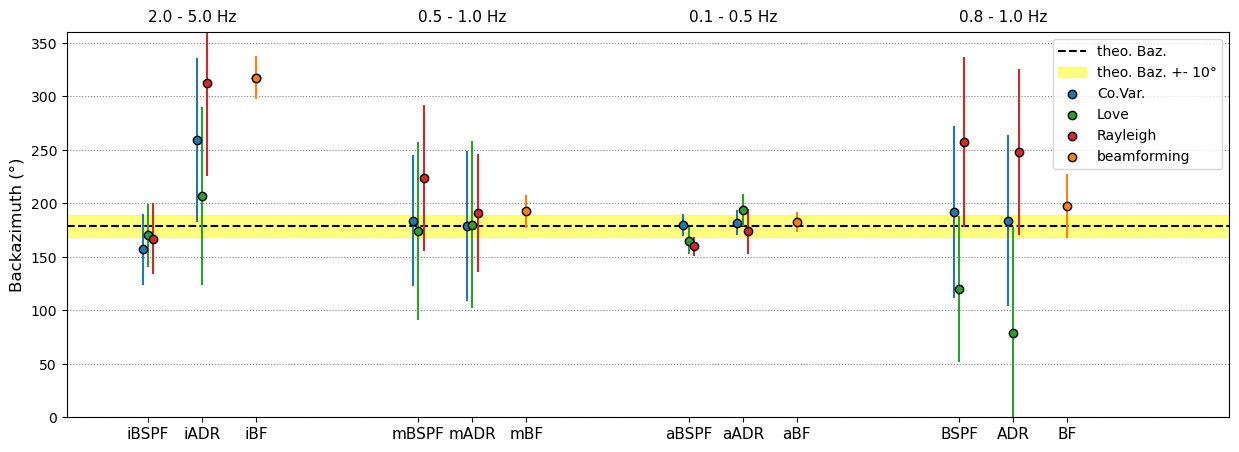

In [35]:
fig = __makeplot_comparison()

fig.savefig(config['path_to_figs']+f"BSPF_M62_baz_comparison_overview.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

## Cross Spectral Density

In [ ]:
def __makeplotStream_csd2(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array, log10

    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors2 = ['darkred', 'darkgreen', 'magenta', 'tab:green', 'red', 'lightgreen']
#     colors2 = ['crimson', 'darkblue', 'red', '#3776ab', 'magenta', 'indigo']

    fig = plt.figure(figsize=(15,14))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    bspf_all_data, bspf_inner_data, adr_all_data, adr_inner_data = [],[],[],[] 
    names, ffs, csds, ffs2, csds2 = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
                
        tmp = st.select(channel=f"*{comp}")
        print(tmp)

        bspf_inner = tmp[0].copy()
        bspf_inner.detrend("linear")
        bspf_inner.taper(0.1)
        bspf_inner.filter("bandpass", freqmin=5, freqmax=15, corners=4, zerophase=True)
        bspf_inner.normalize()
        
        adr_inner = tmp[1].copy()
        adr_inner.detrend("linear")
        adr_inner.taper(0.1)
        adr_inner.filter("bandpass", freqmin=5, freqmax=15, corners=4, zerophase=True)
        adr_inner.normalize()
        
        nseg = int(5*tmp[0].stats.sampling_rate)
        
        ff, Pxy = csd(  
                        bspf_inner.data,
                        adr_inner.data,
                        fs=bspf_inner.stats.sampling_rate,
                        nperseg=nseg,
                        window='hann',
                        noverlap=int(0.5*nseg),
                        nfft=None,
                        detrend='constant',
                        return_onesided=True,
                        scaling='density',
                        axis=-1,
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}"+r"$_{inner}$")
        ffs.append(ff)
        csds.append(Pxy)

        adr_inner_data.append(adr_inner.data)
        bspf_inner_data.append(bspf_inner.data)
        
        ## _____________________________________
        
        bspf_all = tmp[0].copy()
        bspf_all.detrend("linear")        
        bspf_all.taper(0.1)
        bspf_all.filter("bandpass", freqmin=0.1, freqmax=1., corners=4, zerophase=True)
        bspf_all.normalize()

        adr_all = tmp[2].copy()
        adr_all.detrend("linear")
        adr_all.taper(0.1)
        adr_all.filter("bandpass", freqmin=0.1, freqmax=1., corners=4, zerophase=True)
        adr_all.normalize()        
            
        nseg = int(20*tmp[0].stats.sampling_rate)
        
        ff2, Pxy2 = csd(  
                        bspf_all.data*rot_scaling,
                        adr_all.data*rot_scaling,
                        fs=bspf_all.stats.sampling_rate,
                        nperseg=nseg,
                        window='hann',
                        noverlap=int(0.5*nseg),
                        nfft=None,
                        detrend='constant',
                        return_onesided=True,
                        scaling='spectrum',
                        axis=-1,
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}"+r"$_{all}$")
        
        ffs.append(ff2)
        csds.append(Pxy2)
        
        adr_all_data.append(adr_all.data)
        bspf_all_data.append(bspf_all.data)
        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), bspf_all_data[0], 'black', label=f"BSPF.Z")
    ax2.plot(hn.times(), bspf_all_data[1], 'black', label=f"BSPF.N")
    ax3.plot(he.times(), bspf_all_data[2], 'black', label=f"BSPF.E")
    ax1.plot(hz.times(), adr_all_data[0], 'darkred', label=r"ADR$_{all}$.Z")
    ax2.plot(hn.times(), adr_all_data[1], 'darkred', label=r"ADR$_{all}$.N")
    ax3.plot(he.times(), adr_all_data[2], 'darkred', label=r"ADR$_{all}$.E")

    ax4.plot(jz.times(), bspf_inner_data[0], 'black', label=f"BSPF.Z")
    ax5.plot(jn.times(), bspf_inner_data[1], 'black', label=f"BSPF.N")
    ax6.plot(je.times(), bspf_inner_data[2], 'black', label=f"BSPF.E")
    ax4.plot(jz.times(), adr_inner_data[0], 'darkred', label=r"ADR$_{inner}$.Z")
    ax5.plot(jn.times(), adr_inner_data[1], 'darkred', label=r"ADR$_{inner}$.N")
    ax6.plot(je.times(), adr_inner_data[2], 'darkred', label=r"ADR$_{inner}$.E")


    for ii, (ff, cc, name) in enumerate(zip(ffs, csds, names)):
#         ax7.plot(ff, 20*log10(abs(cc)), label=name[2:], alpha=0.6, color=colors2[ii])
        if "all" in name:
            ax7.plot(ff, abs(cc), label=name[2:], alpha=0.6, color=colors2[ii])
        elif "inner" in name:       
            if "Z" in name:
                ax8 = ax7.twinx()
            ax8.plot(ff, abs(cc), label=name[2:], alpha=0.6, color=colors2[ii])
            

#     ax7.set_yscale("log")
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2, bbox_to_anchor=(0.95, 1.10), ncol=2)
        ax.set_ylabel(f"$\omega$ ({rot_unit})", fontsize=font)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
    
    ax7.set_xscale("log")   
    ax7.grid(which="both", ls=":", alpha=0.7, color="grey")
    ax7.legend(fontsize=font-2, ncol=3, loc=2)
    ax7.set_xlim(0.1, 20)
    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    sqrthz=r"$\sqrt{Hz}$"
#     ax7.set_ylabel(f"Cross Spectral Density \n (dB rel. to 1 nrad$^2$/s$^2$/Hz)", fontsize=font)
    ax7.set_ylabel(f"Cross Spectral Density ({rot_unit}/{sqrthz}')", fontsize=font)
    
    
    ax8.legend(fontsize=font-2, ncol=3, loc=1)
    ax8.set_ylabel(f"Cross Spectral Density ({rot_unit}/{sqrthz}')", fontsize=font, color="tab:red")
    ax8.tick_params(axis='y', colors='tab:red')
    
    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)


    bbox = list(ax7.get_position().bounds)
    bbox[3] = .85*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6, ax7, ax8]:
        ax.tick_params(axis="y", labelsize=font-2)
        ax.tick_params(axis="x", labelsize=font-2)
            
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
fig = __makeplotStream_csd2(st0, config);

fig.savefig(config['path_to_figs']+f"BSPF_M62_baz_csd.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

In [ ]:
from functions.makeplotStream_cwt import __makeplotStream_cwt

In [ ]:
# __makeplotStream_cwt(st0, config, fscale=None);

## Coherence in Octaves

In [ ]:
from functions.makeplot_coherence_octaves import __coherence_in_octaves

In [ ]:
# def __coherence_in_octaves(st_in, fmin, fmax, normalize=False, plot=True):

#     from matplotlib.gridspec import GridSpec
#     from numpy import arange, mean, nan, nanmax
#     from pandas import DataFrame
#     from functions.get_octave_bands import __get_octave_bands
#     from scipy.signal import coherence

#     flower, fupper, fcenter = __get_octave_bands(fmin, fmax, fband_type="one-third-octave")
#     # flower, fupper, fcenter = __get_octave_bands(fmin, fmax, fband_type="octave")

#     fbands = [(fl, fu) for fl, fu in zip(flower, fupper)]

#     colors = {"Z":"tab:red", "N":"tab:green", "E":"blue"}

#     ## _____________________

# #     ddf = 3
# #     fcenter = arange(fmin+ddf, fmax-ddf, 1)
# #     fbands = [(fc - ddf, fc + ddf) for fc in fcenter]

#     out = {}

#     if plot:
#         NN = 5
#         font = 12
#         rot_scale, rot_unit, omega, sqrt_hz = 1e6, r"$\mu$rad/s" , r"$\Omega$", r"$\sqrt{Hz}$"

#         fmin_i, fmax_i = 1.0, 10.0 ## 0.16, 16.5
#         fmin_a, fmax_a = 0.1, 1.0  ## 0.02, 1.3


#         fig = plt.figure(figsize=(15,14))

#         gs = GridSpec(NN, 2, figure=fig)

#         ax1 = fig.add_subplot(gs[0, :-1])
#         ax2 = fig.add_subplot(gs[1, :-1])
#         ax3 = fig.add_subplot(gs[2, :-1])

#         ax4 = fig.add_subplot(gs[0, 1:])
#         ax5 = fig.add_subplot(gs[1, 1:])
#         ax6 = fig.add_subplot(gs[2, 1:])

#         ax7 = fig.add_subplot(gs[3:, :])

#         plt.subplots_adjust(hspace=0.2)



#     for ii, comp in enumerate(["Z", "N", "E"]):

#         tr0 = st_in.select(station="BSPF", channel=f'*{comp}').copy()[0]
#         tr1 = st_in.select(station="BSPF", channel=f'*{comp}').copy()[0]
#         tr2 = st_in.select(station="RPFO", location="in", channel=f'*{comp}').copy()[0]
#         tr3 = st_in.select(station="RPFO", location="al", channel=f'*{comp}').copy()[0]

#         tr0 = tr0.detrend("linear").taper(0.1).filter("bandpass", freqmin=fmin_i, freqmax=fmax_i, corners=4, zerophase=True)
#         tr1 = tr1.detrend("linear").taper(0.1).filter("bandpass", freqmin=fmin_a, freqmax=fmax_a, corners=4, zerophase=True)
#         tr2 = tr2.detrend("linear").taper(0.1).filter("bandpass", freqmin=fmin_i, freqmax=fmax_i, corners=4, zerophase=True)
#         tr3 = tr3.detrend("linear").taper(0.1).filter("bandpass", freqmin=fmin_a, freqmax=fmax_a, corners=4, zerophase=True)

#         if normalize:
#             tr0 = tr0.normalize()
#             tr1 = tr1.normalize()
#             tr2 = tr2.normalize()
#             tr3 = tr3.normalize()
#             rot_scale, rot_unit = 1, r"rad/s"

#         co2, co3 = [], []
#         for nn, (fl, fu) in enumerate(fbands):
#             s0, s1, s2, s3 = tr0.copy(), tr1.copy(), tr2.copy(), tr3.copy()

#             df = s1.stats.sampling_rate

#             tseg = 1/fl # 1/fcenter[nn]
#             nseg = int(df*tseg) if int(df*tseg) < len(s1.data) else len(s1.data)
#             nover = int(0.5*nseg)

#             ff2, coh2 = coherence(s0.data, s2.data, fs=df, window='hann', nperseg=nseg, noverlap=nover)
#             ff3, coh3 = coherence(s1.data, s3.data, fs=df, window='hann', nperseg=nseg, noverlap=nover)

# #             ff2, coh2 = coherence(s1.data, s2.data, fs=df, window='hann')
# #             ff3, coh3 = coherence(s1.data, s3.data, fs=df, window='hann')

#             for i in range(len(ff2)):
#                 if ff2[i] <= fl or ff2[i] >= fu:
#                     coh2[i], coh3[i] = nan, nan

#             plt.semilogx(ff2, coh2)

#             co2.append(nanmax(coh2))
#             co3.append(nanmax(coh3))

#         if plot:

#             if comp == "Z":
#                 ax1.plot(tr0.times(), tr0.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax1.plot(tr2.times(), tr2.data*rot_scale, color=colors[comp], label=f"ADR-{comp}")

#                 ax4.plot(tr1.times(), tr1.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax4.plot(tr3.times(), tr3.data*rot_scale, color=colors[comp], label=f"ADR-{comp}")

#             elif comp == "N":
#                 ax2.plot(tr0.times(), tr0.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax2.plot(tr2.times(), tr2.data*rot_scale, color=colors[comp], label=f"ADR-{comp}")

#                 ax5.plot(tr1.times(), tr1.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax5.plot(tr3.times(), tr3.data*rot_scale, color=colors[comp], label=f"ADR-{comp}")

#             elif comp == "E":
#                 ax3.plot(tr0.times(), tr0.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax3.plot(tr2.times(), tr2.data*rot_scale,color=colors[comp], label=f"ADR-{comp}")

#                 ax6.plot(tr1.times(), tr1.data*rot_scale, color="k", label=f"BSPF-{comp}")
#                 ax6.plot(tr3.times(), tr3.data*rot_scale, color=colors[comp], label=f"ADR-{comp}")

#             for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
#                 ax.legend(loc=1, ncol=2)
#                 ax.set_ylabel(f"{omega} ({rot_unit})", fontsize=font)

#             ax7.scatter(fcenter, co2, s=50, marker="s", label="BSPF - RPFO_inner", zorder=2, color="w", edgecolors=colors[comp])
#             ax7.plot(fcenter, co2, ls="-", color=colors[comp])

#             ax7.scatter(fcenter, co3, s=50, label="BSPF - PRFO_all", zorder=2, color="w", edgecolors=colors[comp])
#             ax7.plot(fcenter, co3, ls=":", color=colors[comp])

#             ax7.legend(loc=4, ncol=3)

#             ax7.set_xscale("log")
#             ax7.grid(ls="--",zorder=0, alpha=.5, which="both")

#             ax7.set_xlabel("Frequency (Hz)", fontsize=font)
#             # ax7.set_ylabel(f"Coherence ({rot_unit}/{sqrt_hz})", fontsize=font)
#             ax7.set_ylabel(f"max. coherence per one-third-octave", fontsize=font)

#             ax1.set_title(f"PRFO inner ({fmin_i} - {fmax_i} Hz)", fontsize=font)
#             ax4.set_title(f"PRFO all ({fmin_a} - {fmax_a} Hz)", fontsize=font)



#         ## prepare output
#         out[f'{comp}_in_fc'] = fcenter
#         out[f'{comp}_in_co']  = co2
#         out[f'{comp}_al_fc'] = fcenter
#         out[f'{comp}_al_co']  = co3

#     if plot:
#         out['fig'] = fig
#         plt.show();


#     return out

In [ ]:
out_coh = __coherence_in_octaves(st0, fmin, fmax, normalize=False, plot=True)

out_coh['fig'].savefig(config['path_to_figs']+f"BSPF_M62_coherence.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Phase Velocity

In [ ]:
from functions.compute_velocity_from_amplitude_ratio import __compute_velocity_from_amplitude_ratio

In [ ]:
# %load functions/compute_velocity_from_amplitude_ratio.py
#!/bin/python3

def __compute_velocity_from_amplitude_ratio(rot0, acc0, baz=None, mode="love", win_time_s=2.0, cc_thres=0.8, overlap=0.5, flim=(None,None), plot=False):

    from scipy.stats import pearsonr
    from numpy import zeros, nan, ones, nanmean, array, nanmax, linspace, std
    from scipy import odr
    from obspy.signal.rotate import rotate_ne_rt
    from obspy.signal.cross_correlation import correlate
    from functions.compute_linear_regression import __compute_linear_regression
    import matplotlib.pyplot as plt

    npts = rot0[0].stats.npts

    df = rot0[0].stats.sampling_rate

    sta, loc = rot0[0].stats.station, rot0[0].stats.location

    ## windows
    t_win = win_time_s
    n_win = int(win_time_s*df)
    nover = int(overlap*n_win)

    ## define windows
    n, windows = 0, []
    while n < npts-n_win:
        windows.append((n, n+n_win))
        n += n_win

    ## invert rotation rate for ADR data
    # if rot0[0].stats.station == "RPFO":
    #     rot0.select(channel="*JZ")[0].data *= -1

    ## rotate channels
    if mode == "love":
        r_acc, t_acc = rotate_ne_rt(acc0.select(channel='*N')[0].data,
                                    acc0.select(channel='*E')[0].data,
                                    baz
                                    )
        acc = t_acc

        ## change polarity !!!
        # rot = rot0.select(channel="*JZ")[0].data * -1
        rot = rot0.select(channel="*JZ")[0].data


    elif mode == "rayleigh":
        r_rot, t_rot = rotate_ne_rt(rot0.select(channel='*N')[0].data,
                                    rot0.select(channel='*E')[0].data,
                                    baz
                                    )
        rot = t_rot

        ## invert vertical acceleration for rayleigh waves
        acc = -1*acc0.select(channel="*HZ")[0].data

    ## add overlap
    windows_overlap = []
    for i, w in enumerate(windows):
        if i == 0:
            windows_overlap.append((w[0],w[1]+nover))
        elif i >= (len(windows)-nover):
            windows_overlap.append((w[0]-nover, w[1]))
        else:
            windows_overlap.append((w[0]-nover, w[1]+nover))

    vel, ccor = ones(len(windows_overlap))*nan, zeros(len(windows_overlap))

    ## compute crosscorrelation for each window
    for j, (w1, w2) in enumerate(windows_overlap):

        ## trying to remove very small rotation values
#         rot_win = array([r if r>5e-8 else 0 for r in rot[w1:w2]])
#         acc_win = array([a if r>5e-8 else 0 for a, r in zip(acc[w1:w2], rot[w1:w2])])

        if mode == "love":
            rot_win, acc_win = rot[w1:w2], 0.5*acc[w1:w2]
        elif mode == "rayleigh":
            rot_win, acc_win = rot[w1:w2], acc[w1:w2]

        if len(rot_win) < 10:
            print(f" -> not enough samples in window (<10)")

        ccor[j], p = pearsonr(rot_win, acc_win)
#         ccor[j] = correlate(rot_win, acc_win, 0, 'auto')[0]

        ## if cc value is above threshold perform odr to get velocity
        if ccor[j] > cc_thres:
            data = odr.RealData(rot_win, acc_win)
            out = odr.ODR(data, model=odr.unilinear)
            output = out.run()
            slope, intercept = output.beta
            vel[j] = abs(slope)


    ## define time axis
    t1 = array([w1/df for (w1, w2) in windows_overlap])
    t2 = array([w2/df for (w1, w2) in windows_overlap])

    time = array([((w2-w1)/2+w1)/df for (w1, w2) in windows_overlap])
    terr = (t2-t1)/2


    if plot:

        cmap = plt.get_cmap("viridis", 10)

        fig, ax = plt.subplots(1,1,figsize=(15,5))

        ax.plot(array(range(len(rot)))/df, rot/max(abs(rot)), alpha=1, color="grey", label="rotation rate (rad/s)")
        ax.plot(array(range(len(acc)))/df, acc/max(abs(acc)), alpha=0.5, color="tab:red", label=r"acceleration (m/s$^2$)")


        ax.set_ylim(-1, 1)
        ax.set_xlim(0, len(rot)/df)
        ax.set_xlabel("Time (s)",fontsize=14)
        ax.set_ylabel("Norm. Amplitude",fontsize=14)
        ax.grid(zorder=0)
        ax.legend(loc=2, fontsize=13)

        ax2 = ax.twinx()
        cax = ax2.scatter(time, vel, c=ccor, s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, label="phase velocity estimate", zorder=2)
        ax2.errorbar(time, vel, xerr=terr, yerr=None, zorder=1, color="lightgrey", marker='o', markersize=2, ls="None")
        ax2.set_ylabel(r"Phase Velocity (m/s)", fontsize=14)
        ax2.set_ylim(bottom=0)
        ax2.set_yticks(linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
        ax2.legend(loc=1, fontsize=13)

        cbar = plt.colorbar(cax, pad=0.08)
        cbar.set_label("Cross-Correlation Coefficient", fontsize=14)

        cax.set_clip_on(False)

        if mode == "rayleigh":
            formula = r"a$_Z$/$\Omega_T$"
            ax.set_title(f"{sta}{loc} | Rayleigh ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)
        elif mode == "love":
            formula = r"a$_T$/2$\Omega_Z$"
            ax.set_title(f"{sta}{loc} | Love ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)

        out = {"time":time, "velocity":vel, "ccoef":ccor, "fig":fig}
    else:
        out = {"time":time, "velocity":vel, "ccoef":ccor}

    return out

## End of File

In [ ]:
acc = st0.select(station="PFO*").copy()
rot = st0.select(station="BSPF").copy()
# rot = st0.select(station="RPFO", location="al").copy()

fmin, fmax = 0.1, 10.0

rot.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)
acc.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)


In [ ]:
out = __compute_velocity_from_amplitude_ratio(
                                                rot,
                                                acc,
                                                baz=baz,
                                                mode='love',
                                                win_time_s=1/fmin,
                                                cc_thres=0.5,
                                                overlap=0.9,
                                                flim=(fmin, fmax),
                                                plot=True,
)
out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_velocity_love_{rot[0].stats.station}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


out = __compute_velocity_from_amplitude_ratio(
                                                rot,
                                                acc,
                                                baz=baz,
                                                mode='rayleigh',
                                                win_time_s=1/fmin,
                                                cc_thres=0.5,
                                                overlap=0.9,
                                                flim=(fmin, fmax),
                                                plot=True,
)
out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_velocity_rayleigh_{rot[0].stats.station}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


# 

### Velocity in F-Bands

In [ ]:
from functions.get_octave_bands import __get_octave_bands

In [ ]:
def __estimate_velocity_in_fbands(rot, acc, ffmin, ffmax):

    # flower, fupper, fcenter = __get_octave_bands(0.01, 10, fband_type="one-third-octave", plot=False)
    flower, fupper, fcenter = __get_octave_bands(ffmin, ffmax, fband_type="octave", plot=False)
    fbands = [(f1, f2) for f1, f2 in zip(flower, fupper)]


    # fbands = [(0.5,0.7), (0.7,0.9), (0.8,1.0), (1.0,2.0), (1.0,5.0), (3.0,8.0), (5.0,12.0)]

    love_velo, rayl_velo = [], []
    r_flabels, l_flabels = [], []

    velo = np.arange(0, 5000, 250)


    for fmin, fmax in fbands:

        # acc = st0.select(station="PFO").copy();
        # # rot = st0.select(station="BSPF").copy();
        # rot = st0.select(station="RPFO").copy();

        rot = rot.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);
        acc = acc.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);

        velo = np.arange(0, 5000, 250)

        cc_threshold = 0.2
        overlap = 0.9

        out_l = __compute_velocity_from_amplitude_ratio(
                                                        rot,
                                                        acc,
                                                        baz=baz,
                                                        mode='love',
                                                        win_time_s=2/fmin,
                                                        cc_thres=cc_threshold,
                                                        overlap=overlap,
                                                        flim=(fmin, fmax),
                                                        plot=False,
        )

        lvel = out_l['velocity'][~np.isnan(out_l['velocity'])]
        if len(lvel) > 0:
            hist = np.histogram(out_l['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=(out_l['ccoef']*100).astype(int), density=False)
            data = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip(hist[0], hist[1])], axis=0 )
            love_velo.append(data)
            l_flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")

        out_r = __compute_velocity_from_amplitude_ratio(
                                                        rot,
                                                        acc,
                                                        baz=baz,
                                                        mode='rayleigh',
                                                        win_time_s=2/fmin,
                                                        cc_thres=cc_threshold,
                                                        overlap=overlap,
                                                        flim=(fmin, fmax),
                                                        plot=False,
        )

        rvel = out_r['velocity'][~np.isnan(out_r['velocity'])]
        if len(rvel) > 0:
            hist = np.histogram(out_r['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=(out_r['ccoef']*100).astype(int), density=False)
            data = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip(hist[0], hist[1])], axis=0 )
            rayl_velo.append(data)
            r_flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")


    #     plt.figure()
    #     plt.hist(out_l['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=out_l['ccoef'], density=False, rwidth=0.9)
    #     plt.show();

    #     plt.figure()
    #     plt.hist(out_r['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=out_r['ccoef'], density=False, rwidth=0.9)
    #     plt.show();


    fig1, ax = plt.subplots(1, 1, figsize=(15,5))

    data = love_velo

    ax.yaxis.grid(True)
    ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Love Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=l_flabels)

    if {rot[0].stats.station} == "RPFO":
        ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station}{rot[0].stats.location[0]} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")
    else:
        ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    plt.show();




    fig2, ax = plt.subplots(1, 1, figsize=(15,5))

    data = rayl_velo

    ax.yaxis.grid(True)
    ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Rayleigh Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=r_flabels)

    if {rot[0].stats.station} == "RPFO":
        ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station}{rot[0].stats.location[0]} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")
    else:
        ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    plt.show();
    return fig1, fig2

In [ ]:
fig1, fig2 = __estimate_velocity_in_fbands(rot, acc, fmin, fmax)

fig1.savefig(config['path_to_figs']+f"BSFP_M62_Love_velocity_fbands_{rot[0].stats.station}_{rot[0].stats.location}.png", format="png", dpi=200, bbox_inches='tight')
fig2.savefig(config['path_to_figs']+f"BSFP_M62_Rayleigh_velocity_fbands_{rot[0].stats.station}_{rot[0].stats.location}.png", format="png", dpi=200, bbox_inches='tight')

## BAZ in F-Bands ??

In [ ]:
def __estimate_baz_in_fbands():

    # flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="one-third-octave", plot=False)
    flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="octave", plot=False)
    fbands = [(f1, f2) for f1, f2 in zip(flower, fupper)]


    # fbands = [(0.5,0.7), (0.7,0.9), (0.8,1.0), (1.0,2.0), (1.0,5.0), (3.0,8.0)]

    backazis = []
    flabels = []

    angles = np.arange(0, 365, 5)

    for fmin, fmax in fbands:

        print(fmin, fmax)

        acc = st0.select(station="PFO").copy();
        rot = st0.select(station="BSPF").copy();
        # rot = st0.select(station="RPFO").copy();

        rot = rot.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);
        acc = acc.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);

        win_time_s = 1/fmin
        cc_threshold = 0.2
        overlap = 0.9



        out3 = __compute_backazimuth_tangent(
                                            rot,
                                            acc,
                                            win_time_s=win_time_s,
                                            overlap=overlap,
                                            baz_theo=None,
                                            cc_thres=cc_threshold,
                                            plot=False,
        )


        if len(out3['baz_est']) > 0:
            hist = np.histogram(out3['baz_est'], bins=len(angles)-1, range=[min(angles), max(angles)], weights=(out3['ccoef']*100).astype(int), density=False)
            dat = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip( hist[0], hist[1])], axis=0 )
            backazis.append(dat)
            flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")
        else:
            print(f"empty results")


    fig, ax = plt.subplots(1, 1, figsize=(15,5))


    ax.yaxis.grid(True)

    ax.violinplot(backazis, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Rayleigh Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=flabels)

    ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    ax.set_ylim(0, 360)

    # fig.savefig(config['path_to_figs']+f"BSFP_Rayleigh_velocity_fbands_{rot[0].stats.station}.png", format="png", dpi=200, bbox_inches='tight')

    plt.show();

# __estimate_baz_in_fbands()